In [10]:
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy
import scipy
import scipy.stats as ss
from matplotlib import rc
rc('text', usetex=True)

import sys
sys.path.insert(0, 'utils/')

from GR_Maze_Utils import *

# Markus' code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

TestTrajModule()

'OK'

In [11]:
# Define and populate the maze structure ma, used as an argument for many functions
ma=NewMaze(6)

In [12]:
# Some lists of nicknames for mice
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
AllNames=RewNames+UnrewNames
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze

### Plot maze layout 

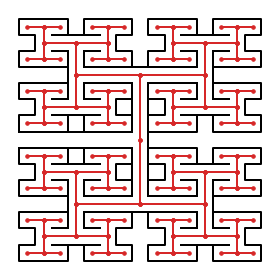

In [13]:
def convert_node_to_maze_pos(node):
    pos = convert_node_to_pos(node)
    return np.array([pos[0]*8 + 7, -pos[1]*8 + 7])

G = create_binary_tree_directed(6)
index_to_state = get_index_to_state_vec(G)

arrows = np.zeros((len(index_to_state),2,2))
for i in range(len(index_to_state)):
    state = index_to_state[i]
    arrows[i,:,0] = convert_node_to_maze_pos(state[0])
    arrows[i,:,1] = convert_node_to_maze_pos(state[1])

plt.close("all")
PlotMazeFunction(None,ma,mode='nodes',numcol=None,figsize=4,col=None)
for i in range(len(index_to_state)):
    plt.plot(arrows[i,0,:],arrows[i,1,:],'C3-',lw=2,alpha = 1)
    plt.plot(arrows[i,0,1],arrows[i,1,1],'C3o',ms=3.5,alpha = 1)
    
#plt.plot([1.5,4],[7,7],'g-',lw = 2.5)
#plt.plot([4],[7],'g>',ms=6)
    
goal_pos = convert_node_to_maze_pos('r100101')
#plt.plot([goal_pos[0]],[goal_pos[1]],'cX',ms=12)
plt.axis("off")
plt.savefig("./plots/maze_layout.pdf")
plt.show()

### Reproduce sudden insight plots 

B1


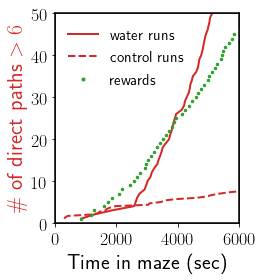

In [5]:
# plot long paths to water & control nodes vs time in maze for all animals, length>=7, time 0-5000 s
plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (3.75,4))
ax = axis.twinx()

nickname = 'B1'
print(nickname)
lmin = 6 # minimal length of path
tf=LoadTraj(nickname+'-tf')

# make array of reward times in frames
re = np.array([y[0]+tf.fr[i,0] for i,r in enumerate(tf.re) for y in r])
# plot cumulative long paths, rewards, time in maze
ti=np.array(tf.fr.tolist()) # time in maze

ptn_1 = FindPathsToNode(116,tf,ma) # water
ptn_1 = append_reward_to_ptn(ptn_1,tf,rew = True)
ptn_2 = FindPathsToNode(94,tf,ma) # three control nodes
ptn_3 = FindPathsToNode(95,tf,ma)
ptn_4 = FindPathsToNode(73,tf,ma)

ptn_co_m = np.concatenate((ptn_2,ptn_3,ptn_4)) # combine the 3 control nodes
ptn_co_m = ptn_co_m[np.where(ptn_co_m[:,2]>=lmin)]
ptn_co_m = ptn_co_m[np.argsort(ptn_co_m[:,3])]

#water node
ptn_m = ptn_1[(ptn_1[:,2]>=lmin)] # impose minimal length
x=[TimeInMaze(p,tf) for p in ptn_m[:,3]]
y= np.arange(len(ptn_m)) + 1
axis.plot(x,y,'C3-',lw=2, label = "water runs")

#control nodes
x=[TimeInMaze(p,tf) for p in ptn_co_m[:,3]]
y=np.arange(len(ptn_co_m))/3+1
axis.plot(x,y,'C3--',lw=2,label = "control runs")
axis.plot([],[],'C2.',label = "rewards")

#rewards
x=[TimeInMaze(p,tf) for p in re]
y=np.arange(len(re))+1
ax.plot(x,y,'C2.', ms = 5, label = "rewards")

axis.set_xlim(0,6000)
axis.set_ylim(0,50)
axis.tick_params(labelsize = 18)
for sp in ['top','bottom','left','right']:
    axis.spines[sp].set_linewidth(1.5)
axis.legend(fontsize = 15, frameon=False)
axis.set_xlabel("Time in maze (sec)",fontsize = 21)
axis.set_ylabel(r"\# of direct paths $> %d$"%lmin,fontsize = 22, color = 'C3')

ax.set_ylim(0,50)
ax.set_yticks([])
ax.tick_params(labelsize = 18)
#ax.set_ylabel(r"\# of rewards",fontsize = 22, color = 'C2')

fig.tight_layout()
fig.savefig("./plots/water_runs_%dlen.pdf"%lmin)
plt.show()

### Plot the cumulative direct paths for different distances from goal 

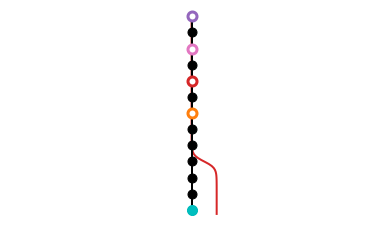

In [6]:
def sig(x):
    return 1/(1 + np.exp(-x))
plt.close("all")

ycont = np.linspace(-0.25,12,100)
xcont = 0.15*sig(5*(3 - ycont)) 
plt.plot(xcont,ycont,'C3-', lw = 2)


y = np.arange(13)
x = np.zeros(13)
plt.plot(x,y,'ko-',lw = 2, ms = 9)
lmins = [6,8,10,12]
cols = ['C1','C3','C6','C4']
for lmin,col in zip(lmins,cols):
    plt.plot([0],[lmin],'o', ms = 9, mew = 3, mfc = 'w', mec = col)
plt.plot([0],[0],'co', ms = 10)
plt.xlim(-1,1)
plt.axis("off")
plt.savefig("./plots/train_incoming.pdf")
plt.show()

6 13 C1
8 13 C3
10 13 C6
12 13 C4
B1


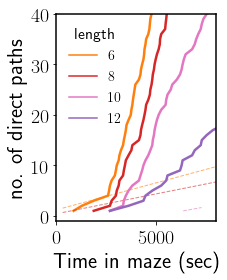

6 13 C1
8 13 C3
10 13 C6
12 13 C4
C1


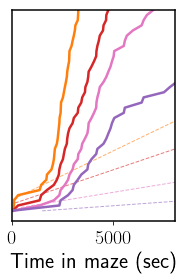

In [7]:
for nickname in ['B1','C1']:
    plt.close("all")
    if nickname == 'B1':
        fig,axis = plt.subplots(1,1,figsize = (3.25,4))
    else:
        fig,axis = plt.subplots(1,1,figsize = (2.75,4))
    
    tf=LoadTraj(nickname+'-tf')
    # make array of reward times in frames
    re = np.array([y[0]+tf.fr[i,0] for i,r in enumerate(tf.re) for y in r])
    # plot cumulative long paths, rewards, time in maze
    ti=np.array(tf.fr.tolist()) # time in maze
    
    ptn_1 = FindPathsToNode(116,tf,ma) # water
    ptn_1 = append_reward_to_ptn(ptn_1,tf,rew = True)
    ptn_2 = FindPathsToNode(94,tf,ma) # three control nodes
    ptn_3 = FindPathsToNode(95,tf,ma)
    ptn_4 = FindPathsToNode(73,tf,ma)
    
    lmins = [6,8,10,12] # minimal length
    lmaxs = [13,13,13,13]
    cols = ['C1','C3','C6','C4']
    
    for lmin,lmax,col in zip(lmins,lmaxs,cols):
        print(lmin,lmax,col)
        ptn_co_m = np.concatenate((ptn_2,ptn_3,ptn_4)) # combine the 3 control nodes
        ptn_co_m = ptn_co_m[np.where((ptn_co_m[:,2]>=lmin)*(ptn_co_m[:,2]<lmax))]
        ptn_co_m = ptn_co_m[np.argsort(ptn_co_m[:,3])]
        
        if len(ptn_co_m) > 1:
            x=[TimeInMaze(p,tf) for p in ptn_co_m[:,3]]
            y=np.arange(len(ptn_co_m))/3+1
            y_linfit = np.polyfit(x,y,1) 
            axis.plot(x,y_linfit[0]*np.array(x) + y_linfit[1],col+'--',alpha = 0.6,lw=1)
        
        ptn_m = ptn_1[(ptn_1[:,2]>=lmin)*(ptn_1[:,4] > -0.5)*(ptn_1[:,2]<lmax)] # impose minimal length
        
        if len(ptn_m) > 1:
            x=[TimeInMaze(p,tf) for p in ptn_m[:,3]]
            y=np.arange(len(ptn_m))+1 
            axis.plot(x,y,col+'-',lw=2.5) # cumulative paths to water
            
        if nickname == 'B1':
            axis.plot([],[],col + '-',label=r"$%d$"%lmin)
        
    x=[TimeInMaze(p,tf) for p in re]
    y=np.arange(len(re))+1
    #ax.plot(x,y,'g-',lw=3)

    print(nickname)
    
    axis.tick_params(labelsize = 20)
    axis.set_xlim(0,8000)
    axis.set_ylim(-1,40)
    for sp in ['top','bottom','left','right']:
        axis.spines[sp].set_linewidth(1.5)
    axis.set_xlabel("Time in maze (sec)",fontsize = 22)
    if nickname == 'B1':
        axis.set_ylabel(r"no. of direct paths",fontsize = 22)
        axis.legend(fontsize = 14,frameon= False, title = "length", title_fontsize = 16)
    else:
        axis.set_yticks([])
    fig.tight_layout()
    fig.savefig("./plots/mice_directpaths_" + nickname + ".pdf")
    plt.show();

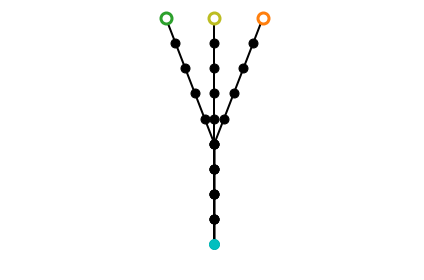

In [8]:
def sig(x):
    return 1/(1 + np.exp(-x))
plt.close("all")


y = np.arange(10)
x1 = np.zeros(10)
x2 = np.zeros(10)
x3 = np.zeros(10)

x1[4:] = 0.05*(y[4:] - y[4])
x2[4:] = -0.05*(y[4:] - y[4])
x3[4:] = 0*(y[4:] - y[4])

plt.plot(x1,y,'ko-',lw = 2, ms = 9)
plt.plot(x2,y,'ko-',lw = 2, ms = 9)
plt.plot(x3,y,'ko-',lw = 2, ms = 9)

plt.plot([x1[-1]],[y[-1]],'o',ms = 11, mew = 3, mfc = 'w', mec = 'C1')
plt.plot([x2[-1]],[y[-1]],'o',ms = 11, mew = 3, mfc = 'w', mec = 'C2')
plt.plot([x3[-1]],[y[-1]],'o',ms = 11, mew = 3, mfc = 'w', mec = 'C8')

plt.plot([0],[0],'co', ms = 10)
plt.xlim(-1,1)
plt.axis("off")
plt.tight_layout()
plt.savefig("./plots/twopaths_home.pdf")
plt.show()

B4


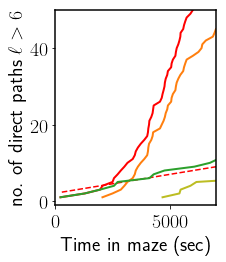

B1


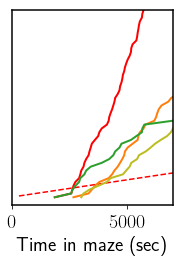

B2


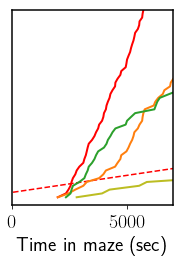

B3


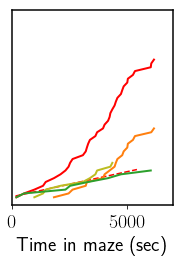

C1


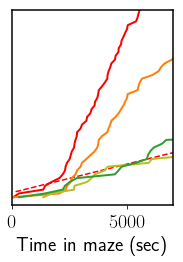

C9


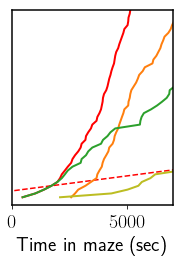

In [9]:
names = deepcopy(RewNames)
names = ['B4','B1','B2','B3','C1','C9']
for nickname in names:
    plt.close("all")
    if nickname == 'B4':
        fig,axis = plt.subplots(1,1,figsize = (3.25,3.75))
    else:
        fig,axis = plt.subplots(1,1,figsize = (2.65,3.75))
    
    tf=LoadTraj(nickname+'-tf')
    # make array of reward times in frames
    re = np.array([y[0]+tf.fr[i,0] for i,r in enumerate(tf.re) for y in r])
    # plot cumulative long paths, rewards, time in maze
    ti=np.array(tf.fr.tolist()) # time in maze
    
    ptn_1 = FindPathsToNode(116,tf,ma) # water
    ptn_1 = append_reward_to_ptn(ptn_1,tf,rew = True)
    ptn_2 = FindPathsToNode(94,tf,ma) # three control nodes
    ptn_3 = FindPathsToNode(95,tf,ma)
    ptn_4 = FindPathsToNode(73,tf,ma)
    
    lmin = 7 # minimal length
    
    ptn_co_m = np.concatenate((ptn_2,ptn_3,ptn_4)) # combine the 3 control nodes
    ptn_co_m = ptn_co_m[np.where(ptn_co_m[:,2]>=lmin)]
    ptn_co_m = ptn_co_m[np.argsort(ptn_co_m[:,3])]
    
    x=[TimeInMaze(p,tf) for p in ptn_co_m[:,3]]
    y=np.arange(len(ptn_co_m))/3+1
    y_linfit = np.polyfit(x,y,1)    
    #ax = plot(x,y,fmts=['b-'],figsize=(6,4))# avg number of such paths to the control nodes
    axis.plot(x,y_linfit[0]*np.array(x) + y_linfit[1],'r--')
    
    ptn_m = ptn_1[(ptn_1[:,2]>=lmin)*(ptn_1[:,4] > -0.5)] # impose minimal length
    x=[TimeInMaze(p,tf) for p in ptn_m[:,3]]
    y=np.arange(len(ptn_m))+1 -  0*(y_linfit[0]*np.array(x) + y_linfit[1])
    axis.plot(x,y,'r-', lw = 2) # cumulative paths to water
    
    
    lmin2 = lmin
    paths_1 = [tf.no[p[0]][p[1]:p[1]+p[2]+1,0] for p in ptn_1]
    
    
    nodes = [[1],[5],[14]]
    cols = ['C1','C8','C2']
    for ipn,pn in enumerate([[1],[5],[14]]):
        filt = np.zeros(len(ptn_1),dtype = bool)
        for pn_ in pn:
            filt += np.array([pn_ in p for p in paths_1],dtype=bool)
        if pn[0] == 0 :
            filt *= (ptn_1[:,2]==lmin2)
        else:
            filt *= (ptn_1[:,2]>=lmin2)
        #filt *= (ptn_1[:,4] > -0.5)
        ptn_m = ptn_1[filt] # impose minimal length
        x=[TimeInMaze(p,tf) for p in ptn_m[:,3]]
        y=np.arange(len(ptn_m))+1
        axis.plot(x,y,cols[ipn]+'-', lw = 2) # cumulative paths to water
        
    axis.tick_params(labelsize = 20)
    axis.set_xlim(0,7000)
    axis.set_ylim(-1,50)
    for sp in ['top','bottom','left','right']:
        axis.spines[sp].set_linewidth(1.5)
    if nickname == 'B4':
        axis.set_ylabel(r"no. of direct paths $\ell >6$",fontsize = 20)
    else:
        axis.set_yticks([])
    axis.set_xlabel("Time in maze (sec)",fontsize = 20)
    
    fig.tight_layout()
    
    fig.savefig("./plots/mice_directpaths_3locs_"+nickname+".pdf")
    print(nickname)
    plt.show();

## Attempt to extract learning from data 

In [11]:
#get states (i.e., directed edges)
def get_states_actions_seqs_from_node_seqs(nodes):
    G = create_binary_tree_directed(6)
    states_seq = []
    actions_seq = []
    for ep in nodes:
        temp = []
        temp2 = []
        for i in range(len(ep)-1):
            state = (ep[i],ep[i+1])
            if len(ep[i+1]) > len(ep[i]):
                action = int(ep[i+1][-1])
            else:
                action = 2
            index = get_state_index(state,G)
            temp += [index]
            temp2 += [action]
        states_seq += [temp[:-1]]
        actions_seq += [temp2[1:]]
    return states_seq, actions_seq

def get_cumulative_counts_and_times(s1,s2,nodes,times):
    nodes_flat = [n for traj in nodes for n in traj]
    times_flat = [t for traj in times for t in traj]

    #get pairwise statistics
    counts = []
    tts = []
    for i in range(len(nodes_flat)-2):
        if nodes_flat[i] == s1[0] and  nodes_flat[i+1] == s1[1]:
            tts += [times_flat[i+1]]
            if nodes_flat[i+2] == s2[1]:
                counts += [1]
            else:
                counts += [0]
    cc = np.cumsum(counts)
    return cc, np.array(tts)

def get_direct_path(start,goal):
    path = []
    dist = find_distance_bn_nodes(start,goal)
    d = dist
    nodes = [start]
    for i in range(len(start)):
        if np.sum(start[:i+1] == goal[:i+1]) != i+1:
            break
            
    

In [12]:
nickname = 'B4'
tf=LoadTraj(nickname+'-tf')
depth = 6
data_to_node = get_data_index_to_node_dict(depth)
nodes,times = get_nodes_from_data_episodic(nickname,data_to_node,thresh = 6)

#append the root at the beginning of each trajectory
# for i in range(len(nodes)):
#     nodes[i] = ['r'] + nodes[i]
#     times[i] = [times[i][0]] + times[i]

In [29]:

goal = 'r1001'
start = 'r01'
path = get_states_from_start_to_goal(start,goal)

print(path)

ccs = []
tts = []
    
for i in range(len(path)-1):
    s1 = path[i+1]
    s2 = path[i]
    cc,tt = get_cumulative_counts_and_times(s1,s2,nodes,times)
    ccs += [cc]
    tts += [tt]

[('r100', 'r1001'), ('r10', 'r100'), ('r1', 'r10'), ('r', 'r1'), ('r0', 'r'), ('r01', 'r0')]


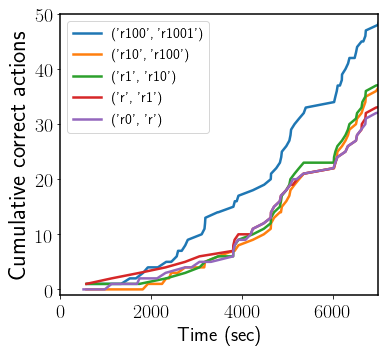

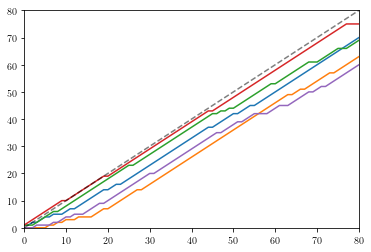

In [32]:
plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (5.5,5))
for i in range(len(ccs)):
    cc = ccs[i]
    tt = tts[i]
    axis.plot(tt,cc, label = path[i],lw = 2.5)
    
axis.legend(fontsize = 14)
axis.tick_params(labelsize = 20)
axis.set_xlim(0,7000)
axis.set_ylim(-1,50)
for sp in ['top','bottom','left','right']:
    axis.spines[sp].set_linewidth(1.5)
axis.set_xlabel("Time (sec)", fontsize = 20)
axis.set_ylabel("Cumulative correct actions", fontsize = 24)
fig.tight_layout()
fig.savefig("./plots/cumcorrect_on_path.pdf")
plt.show()

plt.close("all")
for cc in ccs:
    plt.plot(cc)
plt.plot([0,100],[0,100],'k--',alpha=0.5)
plt.ylim(0,80)
plt.xlim(0,80)
plt.show()

[81.23389336 73.53280973  0.20060234 25.08337913]
[96.26140883 24.37998474  0.14934974 50.        ]
[62.30525691 53.45665069  0.12469701 23.40067289]
[33.68258693 61.86498284  0.17048965 50.        ]
[5.38967870e+01 2.92559269e+01 3.64029124e-02 5.00000000e+01]
[79.99981956  0.          0.         50.        ]


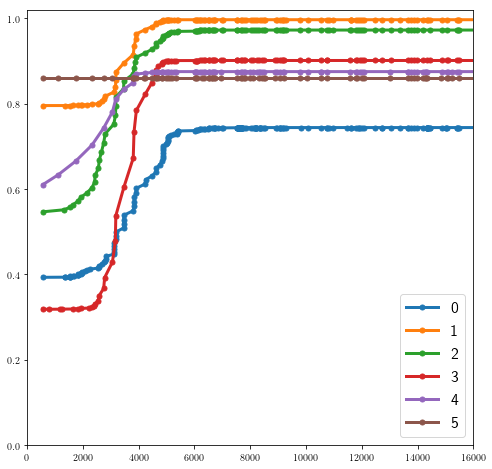

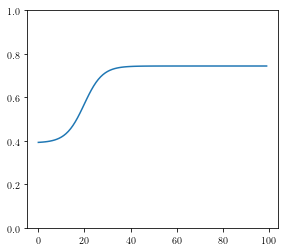

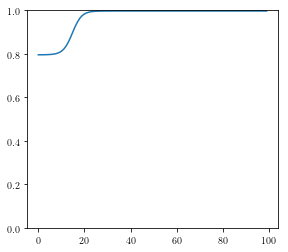

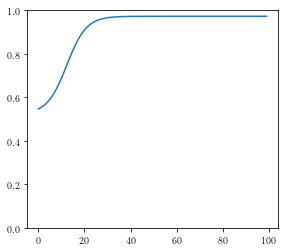

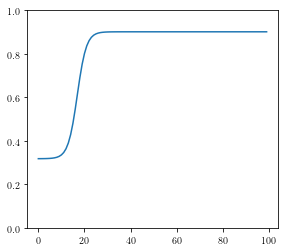

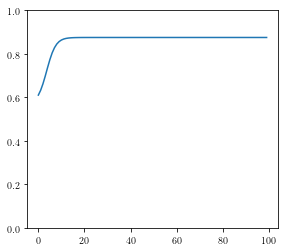

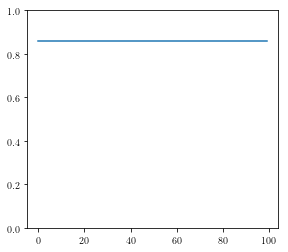

In [229]:
plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (8,8))
for ii in range(len(ccs)):
    cc = ccs[ii]
    tt = tts[ii]
    times_sig = [0]
    for i in range(len(cc)-1):
        if cc[i+1] - cc[i] > 0.5:
            times_sig += [i+1]

    #print(times_sig, len(tt))

    x = L_sig_opt(times_sig)
    T = times_sig[-1]
    ri = x[0]/T
    delr = x[1]/T
    tau = x[2]*T
    beta = x[3]/T
    t = np.linspace(0,T,100)
    sig_pred = ri*t + (delr/beta)*np.log(sig(beta*tau)/sig(-beta*(t-tau)))
    print(x)
    fg,ax = plt.subplots(1,1,figsize = (4.5,4))
    ax.plot(r_sig(ri,delr,tau,beta,np.linspace(0,T,100)))
    ax.set_ylim(0,1)
    #plt.show()
    
    axis.plot(tt[:T],(r_sig(ri,delr,tau,beta,np.arange(T))),'o-',lw = 3,ms = 5,label= "%d"%ii)
axis.set_ylim(0,1.02)
axis.set_xlim(0,16000)
axis.legend(fontsize = 16)
plt.show()

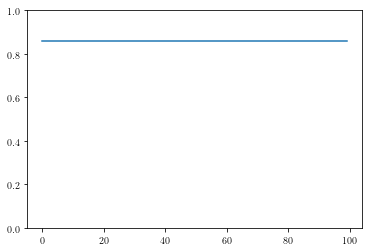

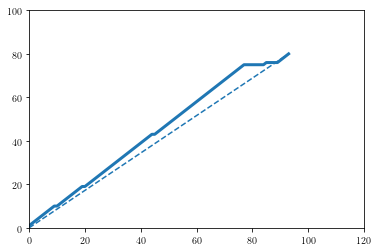

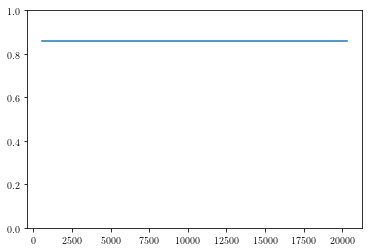

In [204]:
plt.close("all")
plt.plot(r_sig(ri,delr,tau,beta,np.linspace(0,T,100)))
plt.ylim(0,1)
plt.show()

plt.close("all")
plt.plot(cc,'C0-',lw=3)
plt.plot(t,sig_pred,'C0--',alpha = 1)
plt.xlim(0,120)
plt.ylim(0,100)
plt.show()

plt.close("all")
plt.plot(tt[:-1],r_sig(ri,delr,tau,beta,np.arange(T)))
plt.ylim(0,1)
plt.show()



In [292]:





start = 'r000'
goal = 'r10'

path = get_states_from_start_to_goal(start,goal)
path

[('r00', 'r000'), ('r0', 'r00'), ('r', 'r0'), ('r1', 'r'), ('r10', 'r1')]